In [1]:
from TopoAnalysis import dem as d
import pandas as pd
import seaborn
import matplotlib.pylab as plt
import pickle as p
from tqdm import tqdm
import pickle
import os
prefix = 'rush_run'
directory = '/path/to/folder/Rush_run' # path to Rush Run DEM
filled = d.FilledElevation.load(directory + prefix + '_filled')
fd = d.FlowDirectionD8.load(directory + prefix + '_flow_direction')
area = d.Area.load(directory + prefix + '_area')
logarea = d.LogArea(area=area)
hs = d.Hillshade.load(directory + prefix + '_hillshade')

In [2]:
# Function to save checkpoint
def save_checkpoint(data, filename):
    with open(filename, 'wb') as f:
        p.dump(data, f)

# Function to load checkpoint if exists
def load_checkpoint(filename):
    if os.path.exists(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)
    else:
        return {}

# Assuming the checkpoint file path is correctly specified
checkpoint_filename = 'path/to/file/' + 'checkpoint_junc_filter_rush_run.pkl'  # Update this to your actual file path

# Load the data
filtered_results = load_checkpoint(checkpoint_filename)

# Check if data was loaded successfully
if filtered_results:
    print("Data loaded successfully.")
else:
    print("Data could not be loaded.")


Data loaded successfully.


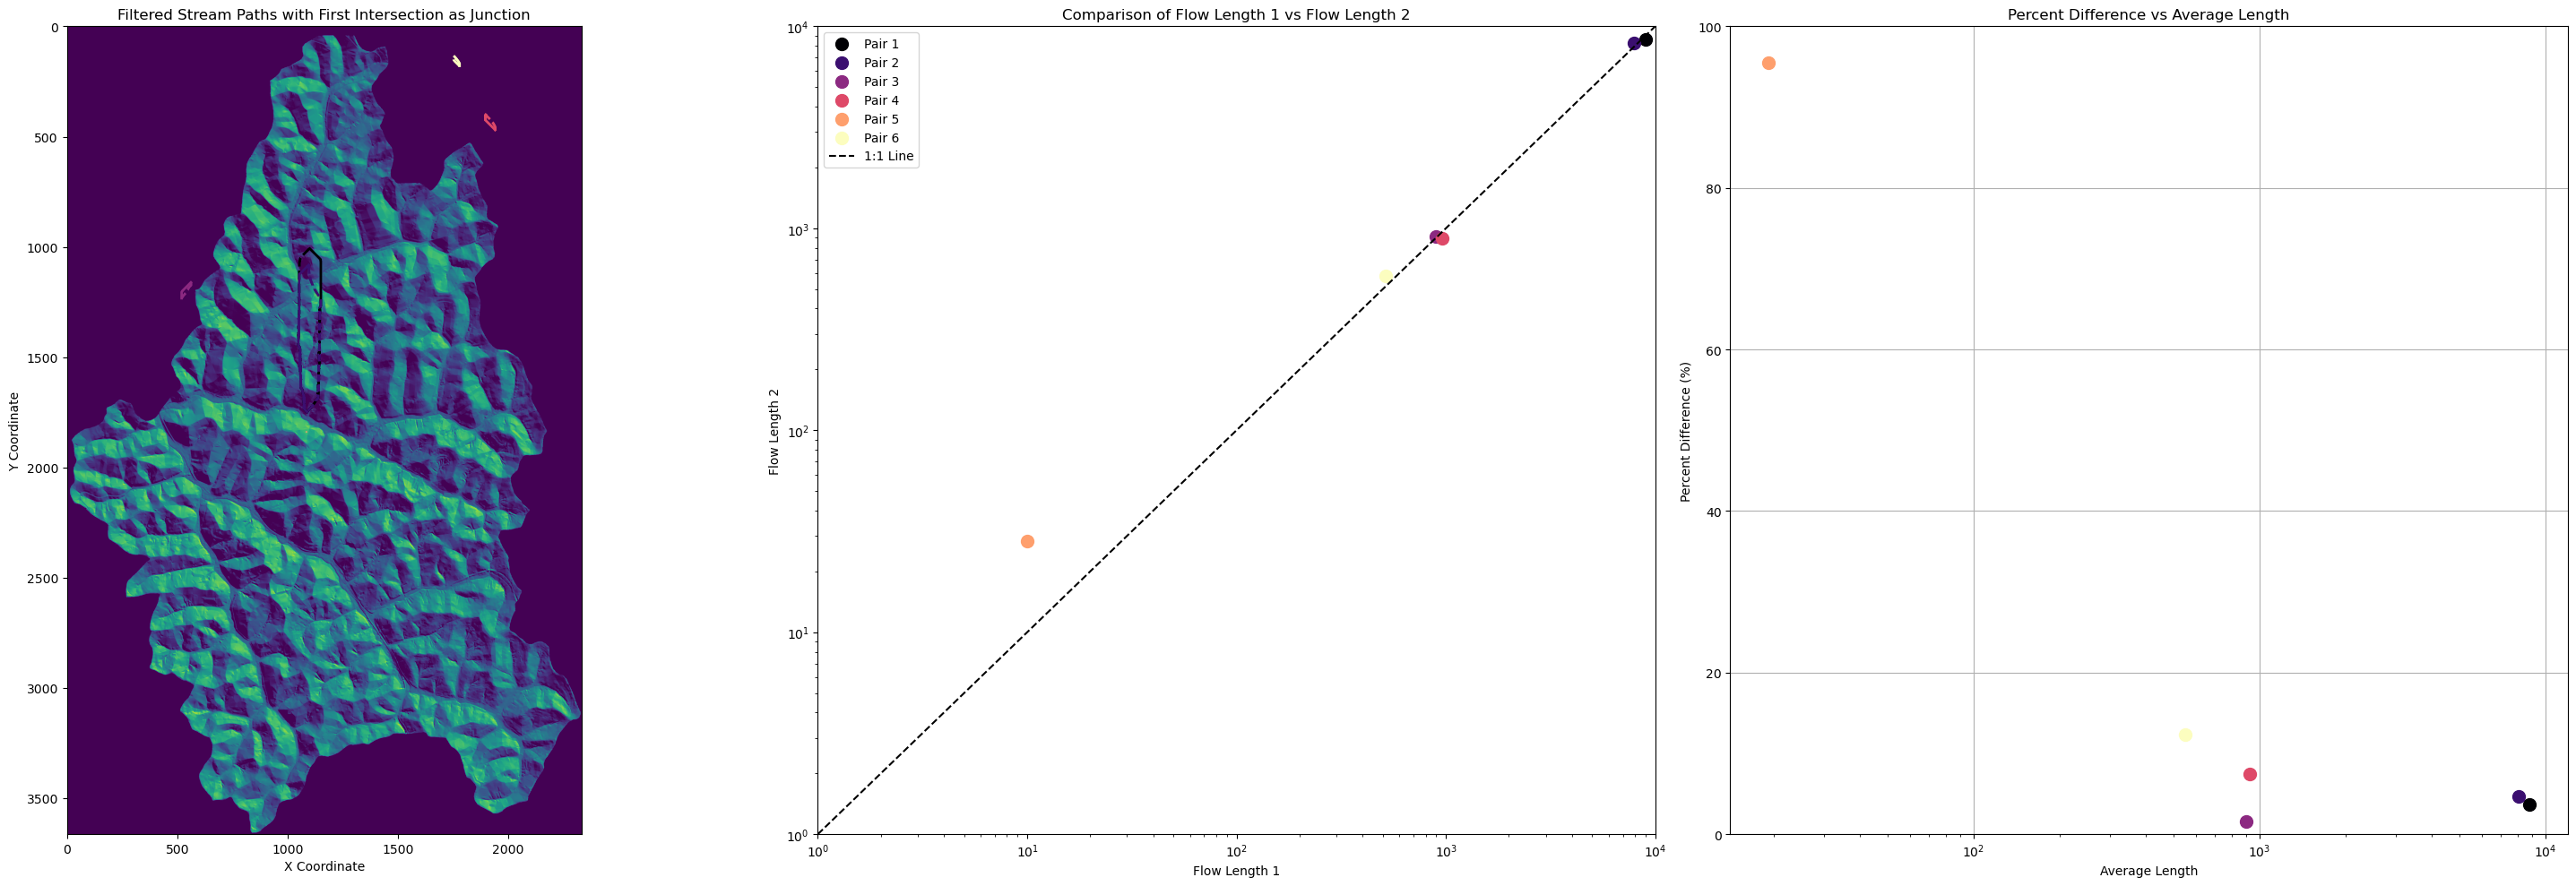

In [3]:
"""
This function was used in order to create figure 1. 

"""

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Compute average lengths, residuals, and percent differences for each pair
pair_scores = []
percent_differences = []
avg_lengths = []
for pair, data in filtered_results.items():
    length1 = data['length1']
    length2 = data['length2']
    avg_length = np.mean([length1, length2])
    percent_diff = abs(length1 - length2) / avg_length * 100  # Calculate percent difference
    residual = abs(length1 - length2) / ((length1 + length2) / 2)
    score = avg_length / (1 + residual)
    pair_scores.append((score, pair, data, percent_diff, avg_length))

# Sort pairs based on the score, descending
sorted_pairs = sorted(pair_scores, key=lambda x: x[0], reverse=True)

# Example: Select a specific range or number of pairs
selected_pairs = (sorted_pairs[94],sorted_pairs[242], sorted_pairs[20029], sorted_pairs[21158], sorted_pairs[-438], sorted_pairs[50119])

# Adjust indices as needed

# Start plotting
plt.figure(figsize=(30, 10))  # Adjusted figure size for 3 subplots

# Generate a color map gradient
num_pairs = len(selected_pairs)
colors = cm.magma(np.linspace(0, 1, num_pairs))

# Subplot 1: Paths
plt.subplot(1, 3, 1)
plt.imshow(hs._griddata, cmap='viridis')  # If you have a map background
for idx, (_, pair_key, data, _, _) in enumerate(selected_pairs):
    path1 = data['path1']
    path2 = data['path2']
    color = colors[idx]
    if path1:
        ys, xs = zip(*path1)
        plt.plot(xs, ys, color=color, linewidth=2)
    if path2:
        ys, xs = zip(*path2)
        plt.plot(xs, ys, color=color, linestyle='--', linewidth=2)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Filtered Stream Paths with First Intersection as Junction')

# Subplot 2: Flow Length Comparison
plt.subplot(1, 3, 2)
for idx, (_, _, data, _, _) in enumerate(selected_pairs):
    plt.scatter(data['length1'], data['length2'], color=colors[idx], s=100, label=f'Pair {idx+1}')
plt.plot([1, 10**4], [1, 10**4], 'k--', label='1:1 Line')
plt.xlim(1, 10**4)
plt.ylim(1, 10**4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Flow Length 1')
plt.ylabel('Flow Length 2')
plt.title('Comparison of Flow Length 1 vs Flow Length 2')
plt.legend()

# Subplot 3: Percent Difference vs Average Length
plt.subplot(1, 3, 3)
for idx, (_, _, _, percent_diff, avg_length) in enumerate(selected_pairs):
    plt.scatter(avg_length, percent_diff, color=colors[idx], s=100, label=f'Pair {idx+1}')
plt.xlabel('Average Length')
plt.ylabel('Percent Difference (%)')
plt.title('Percent Difference vs Average Length')
plt.xscale("log")
plt.ylim(0,100)
plt.grid(True)

plt.tight_layout()
plt.show()
